In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classes = ['airplane', 
'automobile' ,
'bird' ,
'cat' ,
'deer' ,
'dog' ,
'frog' ,
'horse ',
'ship ',
'truck']

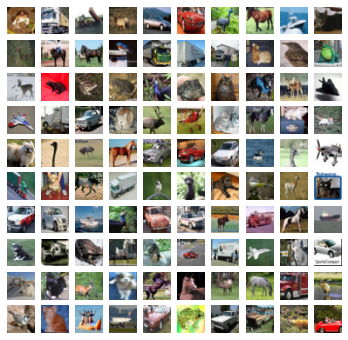

In [5]:
plt.figure(figsize = (6,6))
for i in range(100):
    plt.subplot(10,10,1+i)
    plt.axis('off')
    plt.imshow(X_train[i],cmap='gray')

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=.2,random_state=5)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


Data Augmenation

In [10]:
train_datagen = ImageDataGenerator(
                    rotation_range =10,
                    rescale = 1./255,
                    width_shift_range = .1,
                    shear_range = .1,
                    zoom_range = .1,
                    horizontal_flip = True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
val_datagen.fit(x_val)

**Model** **Building**

CNN

In [11]:
cnn_model = Sequential(
            [Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
            MaxPool2D(2,2),

            Conv2D(64,(3,3),padding='same',activation='relu'),
            MaxPool2D(2,2),

            Conv2D(1000,(3,3),activation='relu'),
            MaxPool2D(2,2),
            tf.keras.layers.Dropout(0.5),

            Flatten(input_shape=(32,32,3)),
            Dense(1025,activation='relu'),
            Dense(1200,activation='relu'),
            Dense(10,activation='softmax')]
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 1000)        577000    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 1000)        0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 1000)        0

In [12]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1 = cnn_model.fit(train_datagen.flow(x_train,y_train, batch_size = 128),
                validation_data = val_datagen.flow(x_val, y_val),
                batch_size = 128,
                epochs = 25,
                verbose = 1)

Epoch 1/25
313/313 [==============================] - 64s 106ms/step - loss: 1.6530 - accuracy: 0.3835 - val_loss: 1.3192 - val_accuracy: 0.5144
Epoch 2/25
313/313 [==============================] - 32s 103ms/step - loss: 1.2580 - accuracy: 0.5447 - val_loss: 1.1581 - val_accuracy: 0.5933
Epoch 3/25
313/313 [==============================] - 33s 105ms/step - loss: 1.1015 - accuracy: 0.6072 - val_loss: 1.0033 - val_accuracy: 0.6411
Epoch 4/25
313/313 [==============================] - 32s 103ms/step - loss: 0.9941 - accuracy: 0.6456 - val_loss: 0.9388 - val_accuracy: 0.6710
Epoch 5/25
313/313 [==============================] - 33s 105ms/step - loss: 0.9233 - accuracy: 0.6736 - val_loss: 0.8290 - val_accuracy: 0.7064
Epoch 6/25
313/313 [==============================] - 33s 106ms/step - loss: 0.8597 - accuracy: 0.6953 - val_loss: 0.7850 - val_accuracy: 0.7252
Epoch 7/25
313/313 [==============================] - 33s 107ms/step - loss: 0.8123 - accuracy: 0.7115 - val_loss: 0.8016 - val_ac

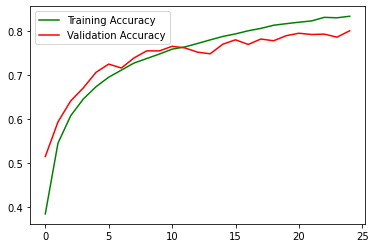

In [ ]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']

plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

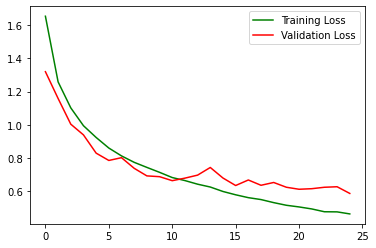

In [ ]:
loss = model1.history['loss']
val_loss = model1.history['val_loss']

plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.legend()

VGG19

In [13]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
                                        monitor='val_accuracy',
                                        patience = 3,
                                        factor = .25,
                                        verbose=1,
                                        min_lr = .000001
)

In [14]:
vgg_model = tf.keras.applications.VGG19(
                input_shape = (32,32,3),
                weights = 'imagenet',
                include_top = False
)
vgg_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [15]:
model2 = tf.keras.models.Sequential()
model2.add(vgg_model)
model2.add(Flatten())
model2.add(Dense(1030,activation='relu'))
model2.add(Dense(1080,activation='relu'))
model2.add(Dense(1080,activation='relu'))
model2.add(Dense(300,activation='relu'))
model2.add(Dense(300,activation='relu'))
model2.add(tf.keras.layers.Dropout(.4))
model2.add(Dense(10,activation='softmax')) 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1030)              528390    
_________________________________________________________________
dense_4 (Dense)              (None, 1080)              1113480   
_________________________________________________________________
dense_5 (Dense)              (None, 1080)              1167480   
_________________________________________________________________
dense_6 (Dense)              (None, 300)               324300    
_________________________________________________________________
dense_7 (Dense)              (None, 300)              

In [16]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)

model2.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
final = model2.fit(
            train_datagen.flow(x_train,y_train,batch_size=256),
            validation_data = val_datagen.flow(x_val,y_val,batch_size=256),
            epochs = 30,
            verbose =1,
            callbacks = [learning_rate_reduction]
)

Epoch 1/30
157/157 [==============================] - 77s 272ms/step - loss: 1.8632 - accuracy: 0.3250 - val_loss: 1.1465 - val_accuracy: 0.6012
Epoch 2/30
157/157 [==============================] - 41s 262ms/step - loss: 1.1170 - accuracy: 0.6143 - val_loss: 0.8648 - val_accuracy: 0.7047
Epoch 3/30
157/157 [==============================] - 41s 263ms/step - loss: 0.9258 - accuracy: 0.6857 - val_loss: 0.7894 - val_accuracy: 0.7287
Epoch 4/30
157/157 [==============================] - 41s 263ms/step - loss: 0.8192 - accuracy: 0.7242 - val_loss: 0.7572 - val_accuracy: 0.7438
Epoch 5/30
157/157 [==============================] - 41s 263ms/step - loss: 0.7547 - accuracy: 0.7452 - val_loss: 0.6786 - val_accuracy: 0.7665
Epoch 6/30
157/157 [==============================] - 41s 263ms/step - loss: 0.7007 - accuracy: 0.7606 - val_loss: 0.6766 - val_accuracy: 0.7696
Epoch 7/30
157/157 [==============================] - 41s 262ms/step - loss: 0.6490 - accuracy: 0.7824 - val_loss: 0.6675 - val_ac

In [18]:
x_test = tf.keras.applications.vgg19.preprocess_input(X_test)
y_pred = model2.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

In [19]:
print(y_pred.shape)
print(Y_test.shape)

(10000,)
(10000, 1)


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test,y_pred)

0.5295